Question 1: 
Compute the sparsity of the movie rating dataset, where sparsity is defined by equation:
Sparsity = Total number of available ratings/Total number of possible ratings

In [1]:
import numpy as np
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('ml-latest-small/ratings.csv')
movie = pd.read_csv('ml-latest-small/movies.csv')
df = pd.DataFrame({'itemID': list(ratings.movieId), 'userID': list(ratings.userId), 'rating': list(ratings.rating)})

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

#Question 1
num_movies = len(set(ratings['movieId']))
num_users = len(set(ratings['userId']))
sparsity = len(ratings) / (num_movies * num_users)

print('Sparsity: ', sparsity)

Sparsity:  0.016999683055613623


Question 2: Plot a histogram showing the frequency of the rating values. To be specific, bin the rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R with rating values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram

In [2]:
#Building R matrix
# extract key information
users = ratings['userId'].values
movies = ratings['movieId'].values
ratings = ratings['rating'].values
movie_set = set(movies)
user_set = set(users)

movieId_map_col = {} # key is the movieId, value is column index
def create_R(users, movies, ratings):
    user_num = len(user_set)
    movie_num = len(movie_set)

    for i in range(movie_num):
        movieId_map_col[list(movie_set)[i]] = i
        
    matrix_R = np.zeros((user_num, movie_num),dtype = float)
    for i in range(len(users)):
        matrix_R[users[i]-1][movieId_map_col[movies[i]]] = ratings[i]
    return matrix_R

matrix_R = create_R(users, movies, ratings)
print(matrix_R.shape)

(610, 9724)


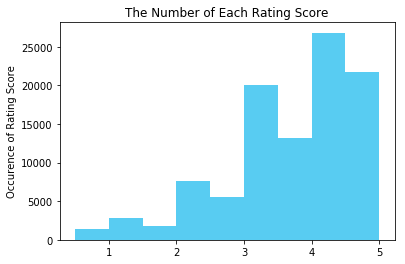

In [6]:
import matplotlib.pyplot as plt

plt.hist(ratings, bins = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], color = '#58CCF2')
plt.title("The Number of Each Rating Score")
plt.ylabel("Occurence of Rating Score")

plt.show()

Question 3: Plot the distribution of the number of ratings received among movies. To be specific, the X-axis should be the movie index ordered by decreasing frequency and the Y -axis should be the number of ratings the movie has received. For example, the movie that has the largest number of ratings has
index 1; ties can broken in any way. A monotonically decreasing curve instead of a histogram is expected.